In [310]:
from sklearn.cluster import KMeans
import numpy as np

def my_kmeans(image_data, K):
    
    centers = image_data[np.random.randint(low = 0, high =image_data.shape[0], size=K),:]
    print (centers)
    
    image_cluster = np.zeros(image_data.shape[0]).astype(int)
    
    def update_centers(image_cluster): #update the corrdiantes of the new centers
        for i in range(0,K):
            new_center = np.mean(image_data[image_cluster==i],axis=0)
            centers[i] = new_center[0:3]
        return centers
    
    def dist_cal(image_cluster, centers): # calculate the distance between each data point to each center
                                          # then find the closest center, and store that info in the last column
        for i in range(image_cluster.shape[0]):
            dist = np.linalg.norm(image_data[i]-centers,axis=1)
            image_cluster[i] = dist.argmin()
        
        centers = update_centers(image_cluster)
        return image_cluster, centers
    
    n =0
    
    while n<=300: # 300 iteration max
        centers_old = centers.copy()
        
        image_cluster, centers_new = dist_cal(image_cluster, centers)

        v = centers_new == centers_old
        if v.all() == False:
            centers = centers_new
        else:
            n = 301
            centers = centers_new
        n += 1
    return image_cluster, centers
    

[[ 110.  154.  201.]
 [ 110.  154.  201.]
 [ 111.  155.  202.]
 ..., 
 [  98.  188.  176.]
 [  75.  176.  160.]
 [  95.  179.  164.]]
[[  90.  193.  172.]
 [ 180.  222.  200.]
 [  33.   32.   11.]
 [ 187.  221.  197.]
 [ 242.  227.  204.]]


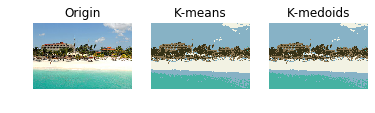

In [314]:
#% This is a simple example to help you test your implementation using
#% an image. Please feel free to use the attached images, or your own
#% images.
#%
#% An example of running this script is
#%   homework1('beach.bmp', 4);
#%
#% You are not supposed to edit this file. Your job is implementing k-means
#% and k-medoids in the other files, mykmeans.m and mykmedoids.m. Have fun!


import matplotlib.pyplot as plt
import numpy as np

#from my_sol_kmeans import my_kmeans
#from my_sol_kmedoids import my_kmedoids

def score(image_name, K):
    image = plt.imread(image_name)
    rows = image.shape[0]
    cols = image.shape[1]
    pixels = np.zeros((rows*cols,3))

    for i in range(rows):
        for j in range(cols):
            pixels[j*rows+i,:] = image[i,j,:]
    
    class1, centroid1 = my_kmeans(pixels, K)
    class2, centroid2 = my_kmedoids(pixels, K)
    
    converted_image1 = np.zeros((rows, cols, 3))
    converted_image2 = np.zeros((rows, cols, 3))
    
    for i in range(rows):
        for j in range(cols):
            converted_image1[i,j,:] = centroid1[class1[j*rows+i],:]
            converted_image2[i,j,:] = centroid2[class2[j*rows+i],:]
            
    converted_image1 /= 255
    converted_image2 /= 255
    
    plt.subplot(1,3,1)
    plt.title('Origin')
    plt.imshow(image)
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.title('K-means')
    plt.imshow(converted_image1)
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.title('K-medoids')
    plt.imshow(converted_image2)
    plt.axis('off')
    
    plt.show()
    return None
    
score('/home/zhang/Desktop/ISYE6740/HW2/beach.bmp',5)

In [2]:

def my_kmedoids(image_data, K):
    kmeans = KMeans(n_clusters=K).fit(image_data)
    label = kmeans.labels_
    centroid = kmeans.cluster_centers_
    return label, centroid